In [1]:
#!/usr/bin/python
from http.cookiejar import CookieJar
from urllib.parse import urlencode
import urllib.request
import fsspec
import numpy as np
from extract import globir

path=r'C:\Users\Carolina\Fregata'
 
# The user credentials that will be used to authenticate access to the data
 
username = "acmoral_cloudy"
password = "G*mYXTD3j!$.BxD"
  
 
# The url of the file we wish to retrieve
 
urls =np.loadtxt(path+r'\files.txt',dtype=str)

urls=urls[:3]
# Create a password manager to deal with the 401 reponse that is returned from
# Earthdata Login
 
password_manager =urllib.request.HTTPPasswordMgrWithDefaultRealm()
password_manager.add_password(None, "https://urs.earthdata.nasa.gov", username, password)
 
 
# Create a cookie jar for storing cookies. This is used to store and return
# the session cookie given to use by the data server (otherwise it will just
# keep sending us back to Earthdata Login to authenticate).  Ideally, we
# should use a file based cookie jar to preserve cookies between runs. This
# will make it much more efficient.
 
cookie_jar = CookieJar()
  
 
# Install all the handlers.
 
opener = urllib.request.build_opener(
    urllib.request.HTTPBasicAuthHandler(password_manager),
    #urllib.request.HTTPHandler(debuglevel=1),    # Uncomment these two lines to see
    #urllib.request.HTTPSHandler(debuglevel=1),   # details of the requests/responses
    urllib.request.HTTPCookieProcessor(cookie_jar))
urllib.request.install_opener(opener)

 

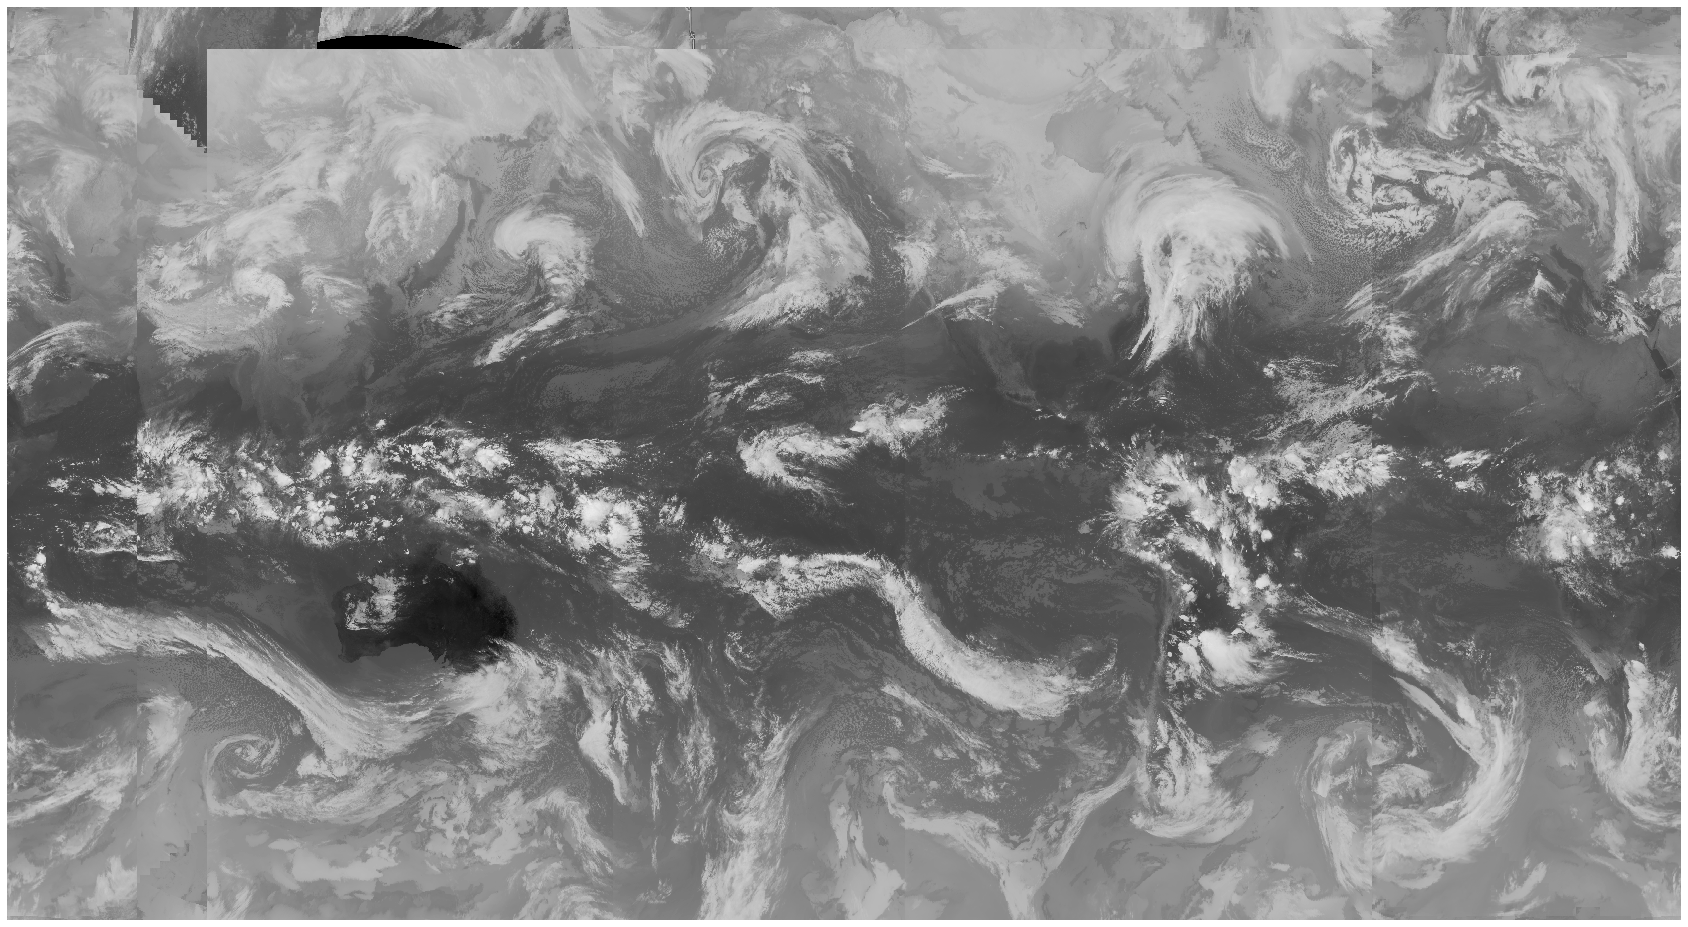

In [19]:
frame=globir(urls[0])
frame.set_time()
frame.extract_arr()
frame.show_im()

In [2]:
scene=[globir(i) for i in urls]
frames=[]
for frame in scene:
    frame.set_time()
    frame.extract_arr()
    frames.append(frame.show_arr())

In [3]:
frames[1]

array([[  0,   0,   0, ..., 117, 117, 117],
       [117, 117, 128, ..., 117, 117, 117],
       [117, 117, 128, ..., 117, 117, 117],
       ...,
       [168, 171, 168, ..., 172, 168, 168],
       [168, 171, 168, ..., 172, 172, 172],
       [171, 171, 171, ..., 172, 172, 172]])